                                    Loan Approval Classification Project Team 2

In [23]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
# Data visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualizations
# Data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Encoding and scaling
from sklearn.model_selection import train_test_split  # Splitting data
# Modeling
from sklearn.linear_model import LogisticRegression  # Logistic regression
from sklearn.tree import DecisionTreeClassifier  # CART model
from sklearn.neighbors import KNeighborsClassifier  # k-NN model
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report  # Model metrics
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.feature_selection import mutual_info_classif  # Feature selection
# Statistical analysis
from scipy.stats import ttest_ind  # T-tests for significance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
Loan_Data=pd.read_csv(r"C:\Users\STSC\downloads\loan_data.csv")
Loan_Data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Exploring the first few rows and Understanding the data columns and their types.

In [25]:
print(Loan_Data.head())
print(Loan_Data.info())
print(Loan_Data.describe())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

Data Cleaning

Checking for missing values

In [26]:
# Checking for missing values
print(Loan_Data.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


Checking for Duplicates

In [27]:
print(Loan_Data.duplicated().sum())

0


Checking for outliers and printing the outliers 

In [28]:
# Defined logical ranges for each column based on domain knowledge
logical_ranges = {
    'person_age': (18, 80),  # Min and max age for a valid loan applicant
    'person_income': (1000, 10000000),  # Reasonable income range
    'person_emp_exp': (0, 80),  # Employment experience (0–50 years)
    'loan_amnt': (500, 10000000),  # Loan amount range
    'loan_int_rate': (0, 50),  # Loan interest rate percentage (0–50%)
    'loan_percent_income': (0, 1),  # Loan as a percentage of income (0–1)
    'credit_score': (300, 850),  # Valid credit score range
    'cb_person_cred_hist_length': (0, 80)  # Credit history length in years
}

#  function to detect outliers
def detect_outliers_with_domain(df, logical_ranges):
    all_outliers = pd.DataFrame()  # Initialize an empty DataFrame
    for col, (min_val, max_val) in logical_ranges.items():
        if col in df.columns:
            # Identify rows where the value is outside the logical range
            outliers = df[(df[col] < min_val) | (df[col] > max_val)].copy()  # Explicitly create a copy
            print(f"Column: {col}")
            print(f"Number of Outliers: {len(outliers)}")
            if not outliers.empty:
                print(outliers)  # Display full rows for better inspection
                all_outliers = pd.concat([all_outliers, outliers])  # Append the outliers
            else:
                print("No outliers detected.")
            print("------")
    return all_outliers

# Called the function to detect and display all outliers
all_outliers_df = detect_outliers_with_domain(Loan_Data, logical_ranges)

# Displayed the total number of unique outliers
print(f"Total unique outlier rows: {len(all_outliers_df)}")

Column: person_age
Number of Outliers: 9
       person_age person_gender person_education  person_income  \
81          144.0          male         Bachelor       300616.0   
183         144.0          male        Associate       241424.0   
575         123.0        female      High School        97140.0   
747         123.0          male         Bachelor        94723.0   
32297       144.0        female        Associate      7200766.0   
32416        94.0          male      High School        29738.0   
32506        84.0          male      High School       114705.0   
37930       116.0          male         Bachelor      5545545.0   
38113       109.0          male      High School      5556399.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
81                125                  RENT     4800.0     VENTURE   
183               121              MORTGAGE     6000.0   EDUCATION   
575               101                  RENT    20400.0   EDUCATION   
747     

Cleaned Dataframe after removing outliers

In [29]:
# Function to remove outliers based on logical ranges
def remove_outliers(df, logical_ranges):
    cleaned_df = df.copy()  # Create a copy of the original DataFrame
    for col, (min_val, max_val) in logical_ranges.items():
        if col in df.columns:
            # Remove rows where values fall outside the logical range
            cleaned_df = cleaned_df[(cleaned_df[col] >= min_val) & (cleaned_df[col] <= max_val)]
    return cleaned_df

# Removed outliers using the logical ranges
cleaned_data = remove_outliers(Loan_Data, logical_ranges)

# Printed the number of rows after removing outliers
print(f"Number of rows before removing outliers: {len(Loan_Data)}")
print(f"Number of rows after removing outliers: {len(cleaned_data)}")

# Displayed the first few rows of the cleaned DataFrame for inspection
print(cleaned_data.head())

Number of rows before removing outliers: 45000
Number of rows after removing outliers: 44991
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hi

Data Preprocessing

Encoded binary variables (person_gender, previous_loan_defaults_on_file) with Label Encoding. 
Used One-Hot Encoding for multi-class variables (loan_intent, person_home_ownership, person_education).

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_categorical_variables(df):
    # List of binary categorical columns for Label Encoding
    binary_columns = ['person_gender', 'previous_loan_defaults_on_file']
    
    # List of multi-class categorical columns for One-Hot Encoding
    multi_class_columns = ['person_education', 'person_home_ownership', 'loan_intent']
    
    # Step 1: Label Encode binary columns
    label_encoders = {}
    for col in binary_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Save encoders for potential reverse transformation
    
    # Step 2: One-Hot Encode multi-class columns without dropping the first category
    df = pd.get_dummies(df, columns=multi_class_columns, drop_first=False)  # Keep all categories
    
    # Step 3: Ensure binary columns and boolean columns are converted to integers
    for col in binary_columns:
        df[col] = df[col].astype(int)
    for col in df.select_dtypes(include=['bool']).columns:  # Convert any remaining boolean columns to integers
        df[col] = df[col].astype(int)
    
    return df

# Cleaned dataframe after removing outliers
cleaned_data = remove_outliers(Loan_Data, logical_ranges)

# Apply the preprocessing function
cleaned_data_numerical = preprocess_categorical_variables(cleaned_data)

# Verify the results
print("Data types after preprocessing:")
print(cleaned_data_numerical.dtypes)

print("\nPreview of the fully numerical dataframe:")
print(cleaned_data_numerical.head())

# Check the dummy variable columns
print("\nDummy variable columns for person_education:")
education_columns = [col for col in cleaned_data_numerical.columns if 'person_education_' in col]
print(education_columns)

Data types after preprocessing:
person_age                        float64
person_gender                       int32
person_income                     float64
person_emp_exp                      int64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int32
loan_status                         int64
person_education_Associate          int32
person_education_Bachelor           int32
person_education_Doctorate          int32
person_education_High School        int32
person_education_Master             int32
person_home_ownership_MORTGAGE      int32
person_home_ownership_OTHER         int32
person_home_ownership_OWN           int32
person_home_ownership_RENT          int32
loan_intent_DEBTCONSOLIDATION       int32
loan_intent_EDUCATION               int32
loan_intent_HOMEIMPROVEMENT         int32
lo

In [31]:
# General overview of the dataset
print("Dataset Information:")
print(cleaned_data_numerical.info())  # Overview of columns, data types, and non-null counts

print("\nSummary Statistics:")
print(cleaned_data_numerical.describe())  # Summary statistics for numerical variables

# Check for missing values
print("\nMissing Values in Each Column:")
print(cleaned_data_numerical.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 44991 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44991 non-null  float64
 1   person_gender                   44991 non-null  int32  
 2   person_income                   44991 non-null  float64
 3   person_emp_exp                  44991 non-null  int64  
 4   loan_amnt                       44991 non-null  float64
 5   loan_int_rate                   44991 non-null  float64
 6   loan_percent_income             44991 non-null  float64
 7   cb_person_cred_hist_length      44991 non-null  float64
 8   credit_score                    44991 non-null  int64  
 9   previous_loan_defaults_on_file  44991 non-null  int32  
 10  loan_status                     44991 non-null  int64  
 11  person_education_Associate      44991 non-null  int32  
 12  person_education

Exploratory Data Analysis (EDA):

Exploring the distribution of continuous variables to identify patterns, skewness, and outliers

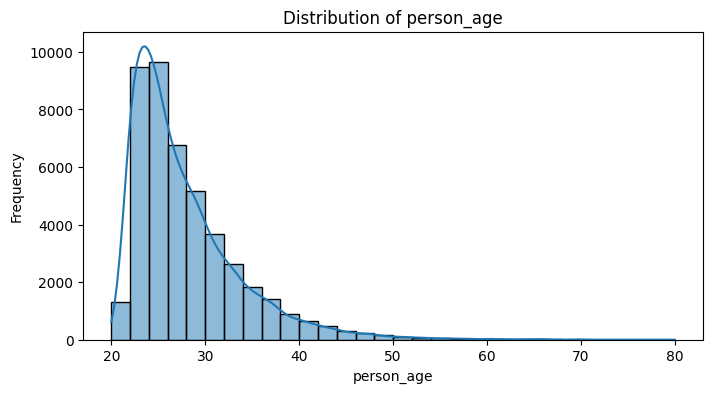

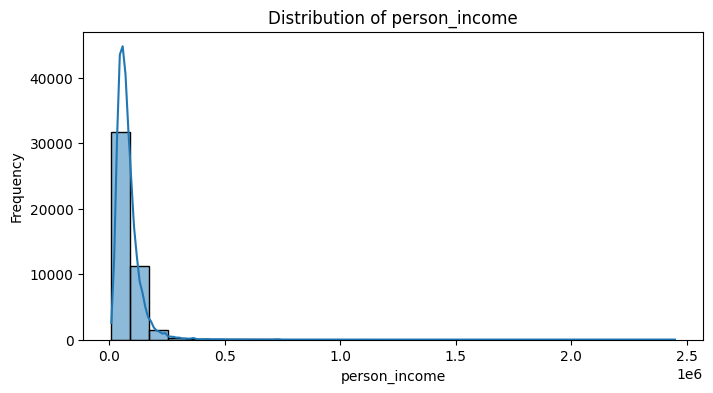

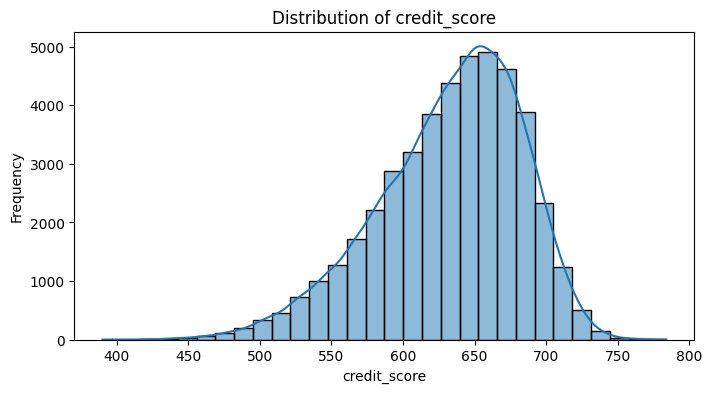

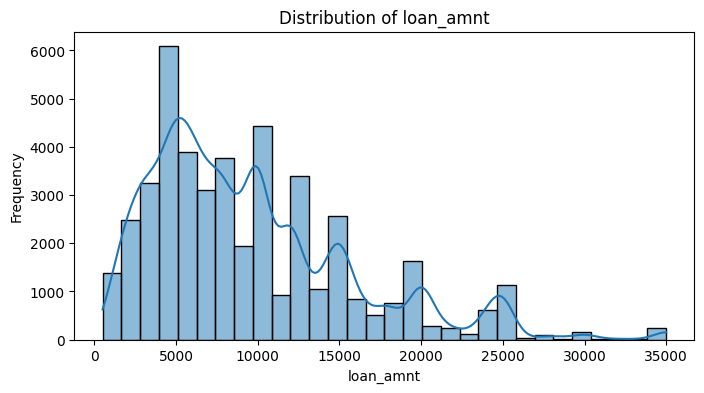

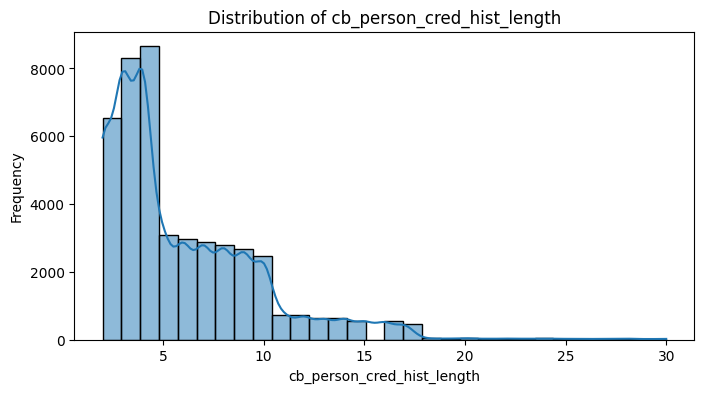

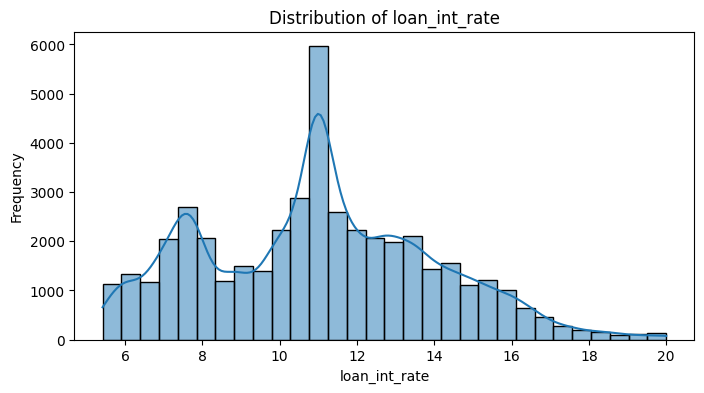

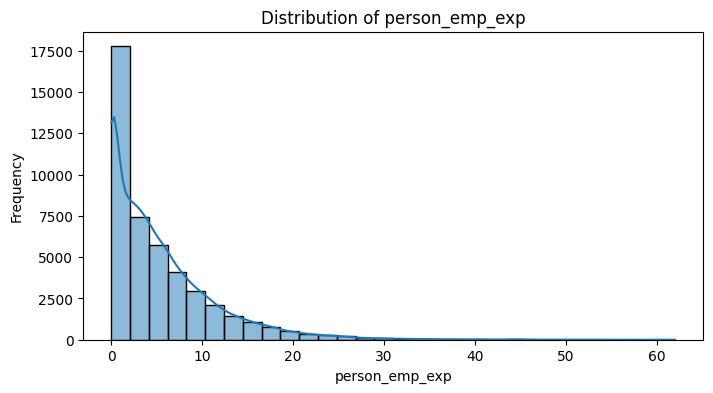

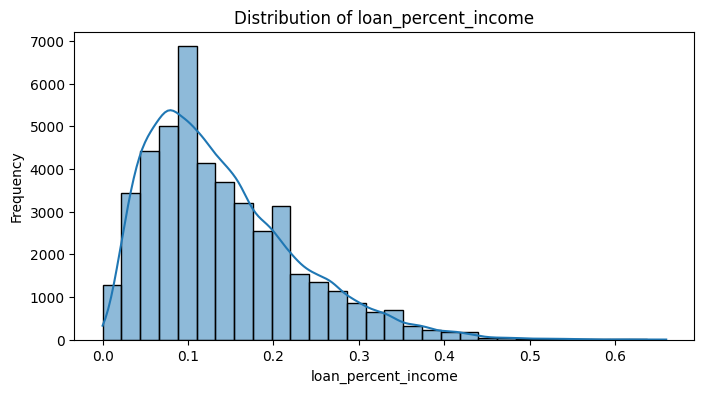

In [32]:
continuous_variables = ['person_age', 'person_income', 'credit_score', 'loan_amnt', 
                        'cb_person_cred_hist_length', 'loan_int_rate', 'person_emp_exp', 
                        'loan_percent_income']

# Plot distributions
for col in continuous_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(cleaned_data_numerical[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Understanding the frequency distribution of categorical features.

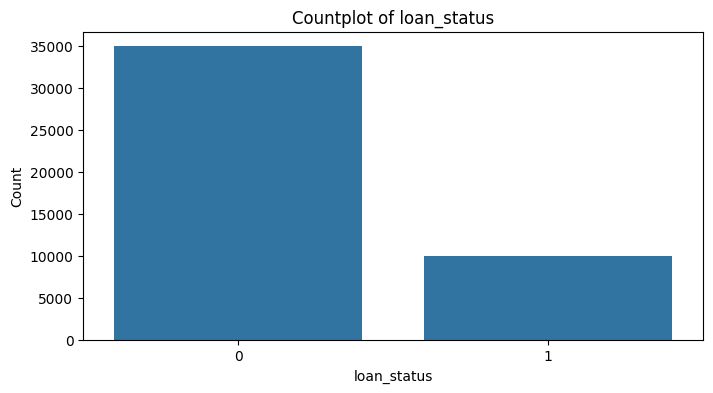

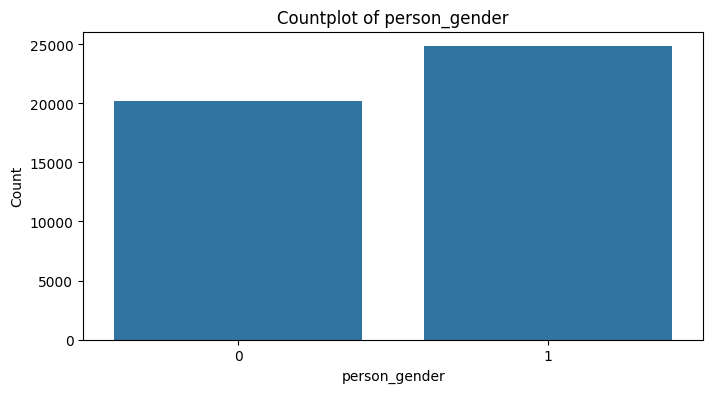

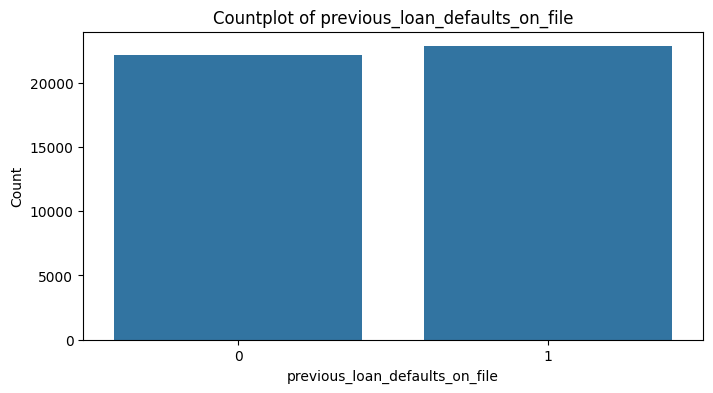

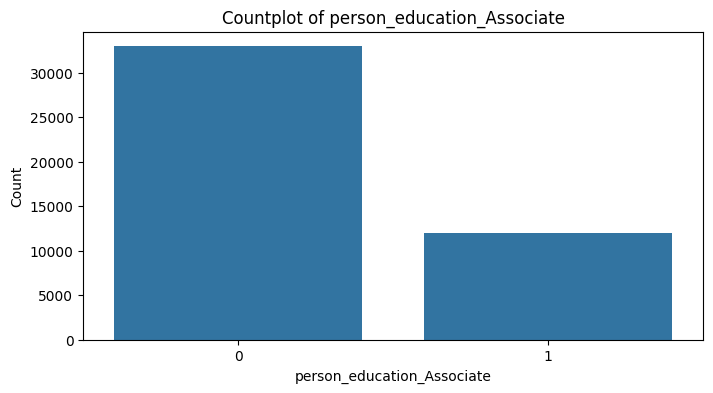

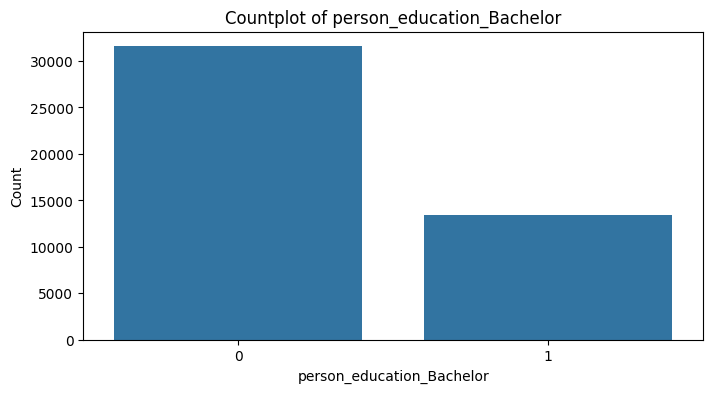

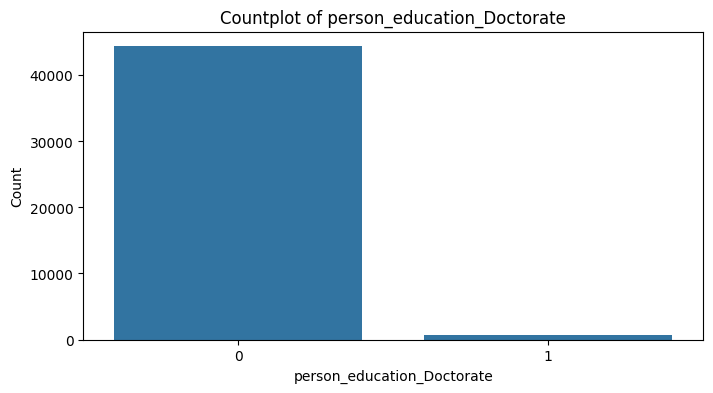

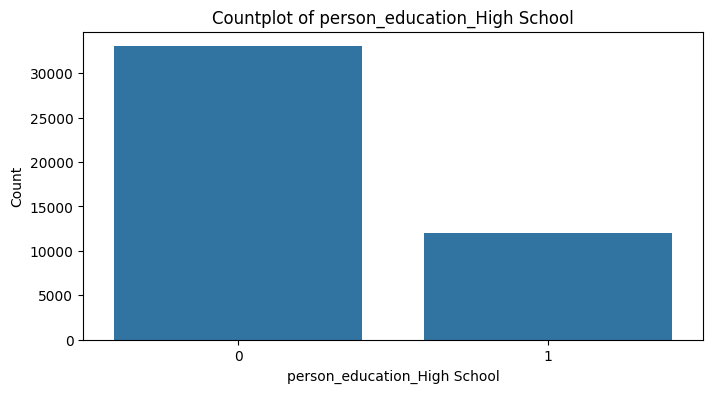

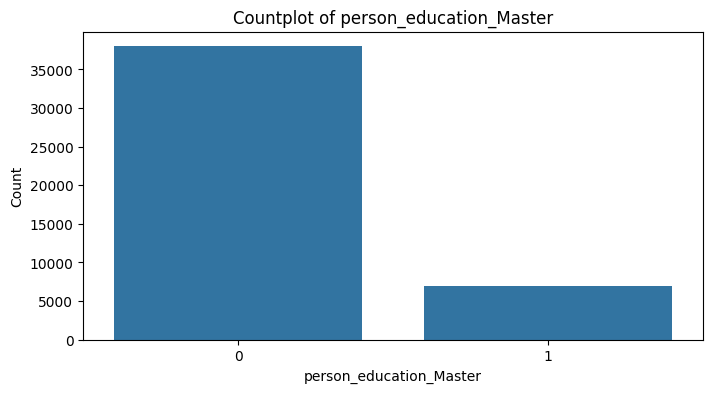

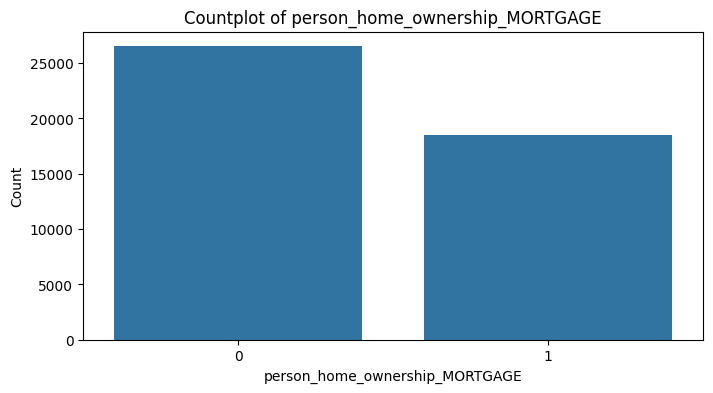

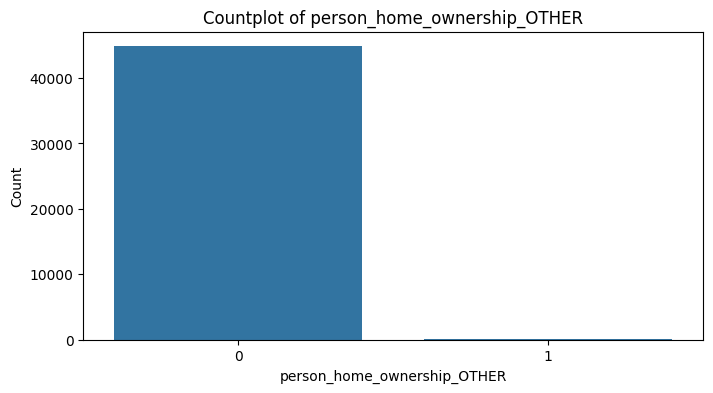

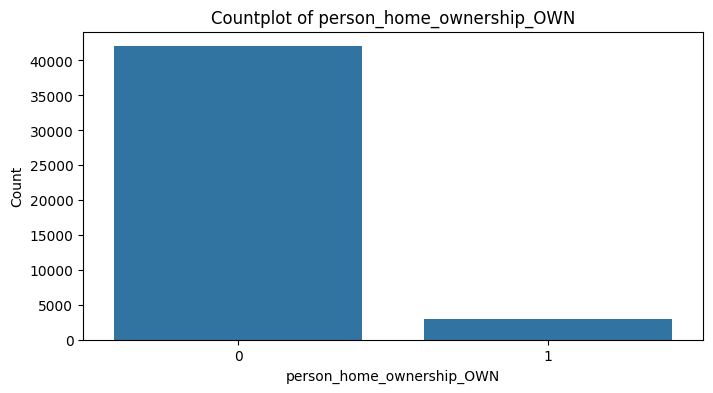

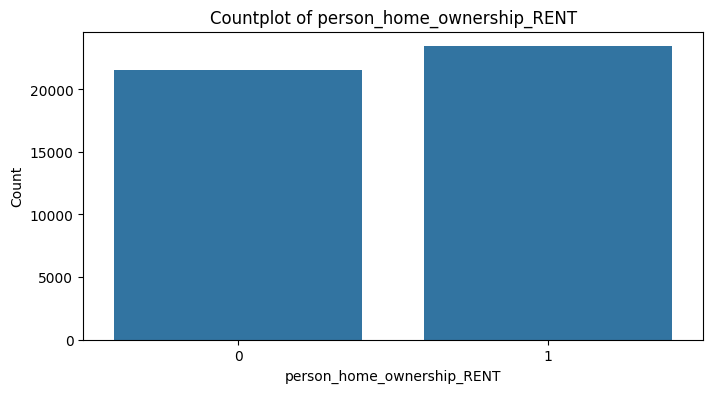

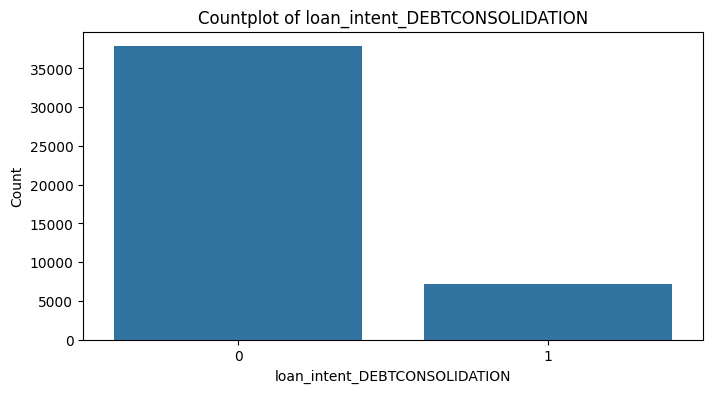

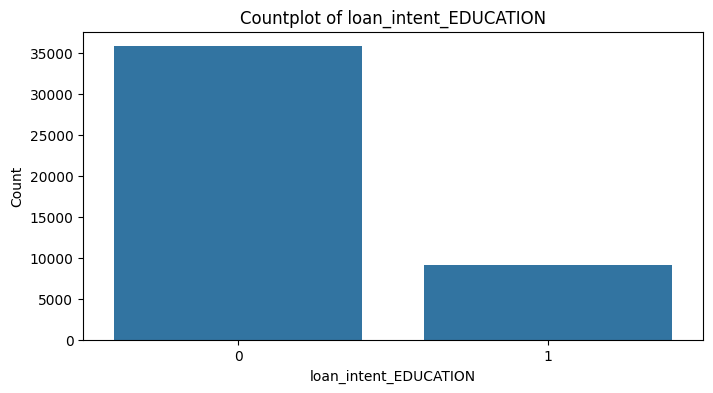

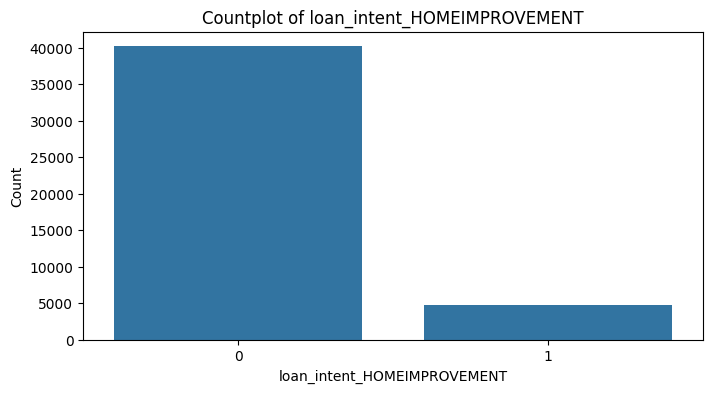

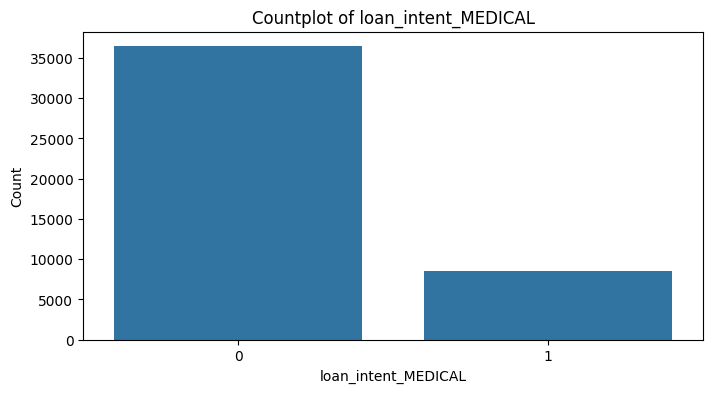

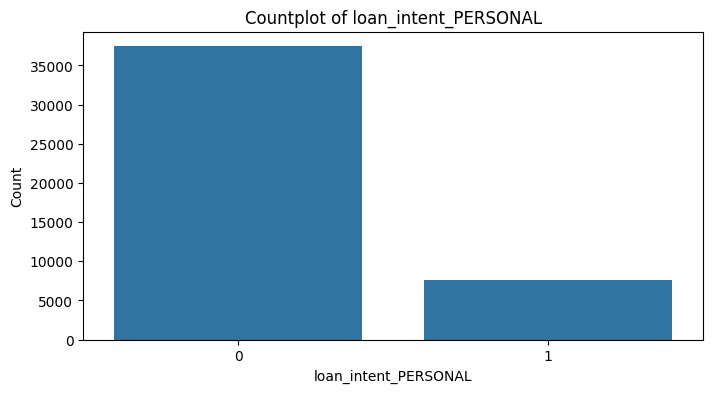

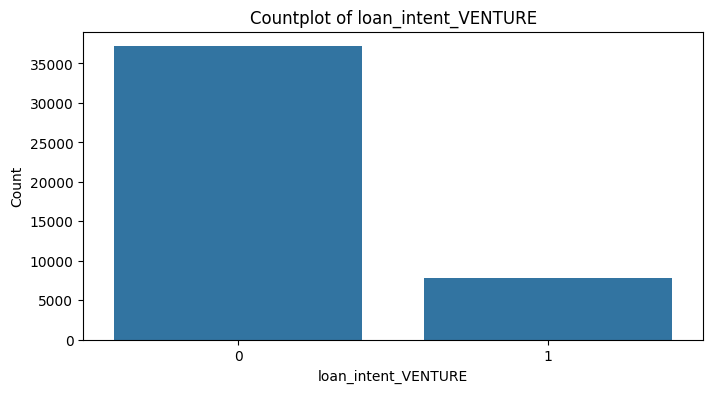

In [33]:
# List of categorical variables
categorical_variables = ['loan_status', 'person_gender', 'previous_loan_defaults_on_file','person_education_Associate','person_education_Bachelor','person_education_Doctorate','person_education_High School','person_education_Master',            
'person_home_ownership_MORTGAGE',     
'person_home_ownership_OTHER',        
'person_home_ownership_OWN',          
'person_home_ownership_RENT',          
'loan_intent_DEBTCONSOLIDATION',     
'loan_intent_EDUCATION',               
'loan_intent_HOMEIMPROVEMENT',       
'loan_intent_MEDICAL',               
'loan_intent_PERSONAL',                
'loan_intent_VENTURE']
# Plot frequency counts for each categorical variable
for col in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=cleaned_data_numerical[col])
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Analyzing Loan Status with Credit score and loan amount 

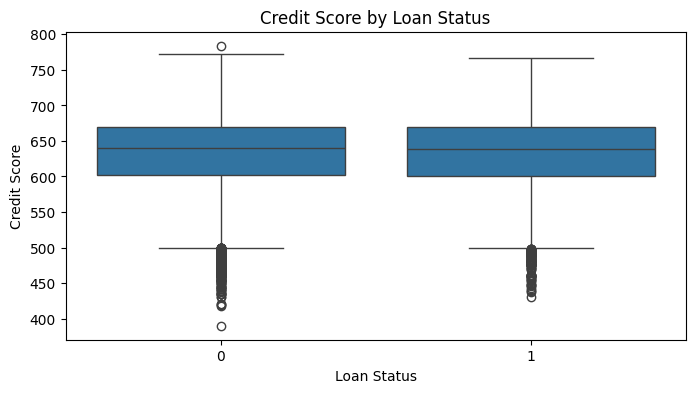

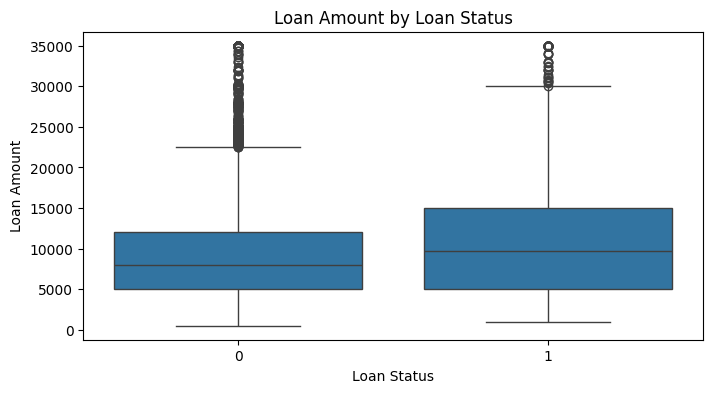

In [24]:
# Boxplot for credit score by loan status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='credit_score', data=cleaned_data_numerical)
plt.title("Credit Score by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()

# Boxplot for loan amount by loan status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='loan_amnt', data=cleaned_data_numerical)
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

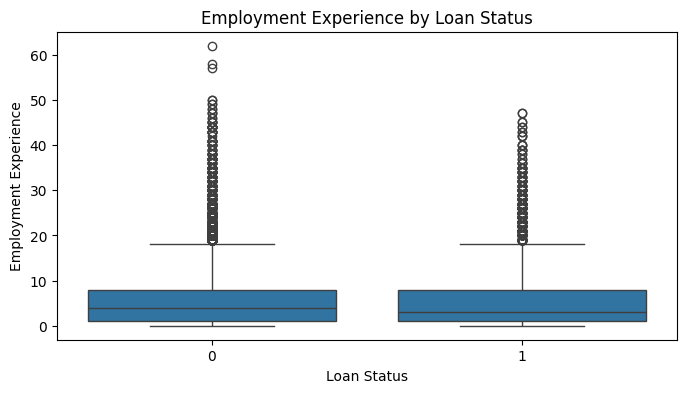

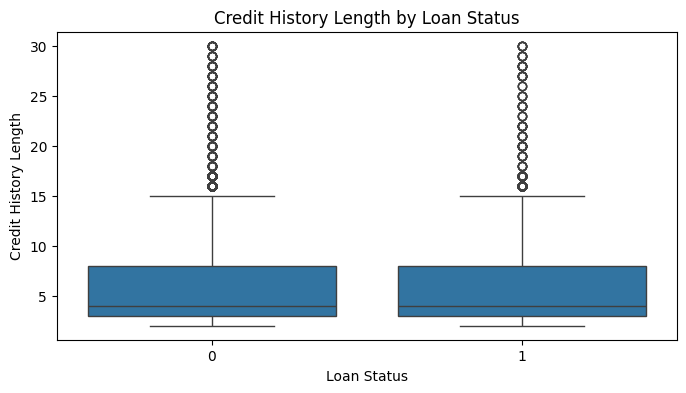

In [13]:
# Employment experience by loan status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='person_emp_exp', data=cleaned_data_numerical)
plt.title("Employment Experience by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Employment Experience")
plt.show()

# Credit history length by loan status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=cleaned_data_numerical)
plt.title("Credit History Length by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit History Length")
plt.show()

Employment Experience Distribution by Loan Status
It helps identify whether applicants with more or less employment experience are more likely to get their loans approved or denied.

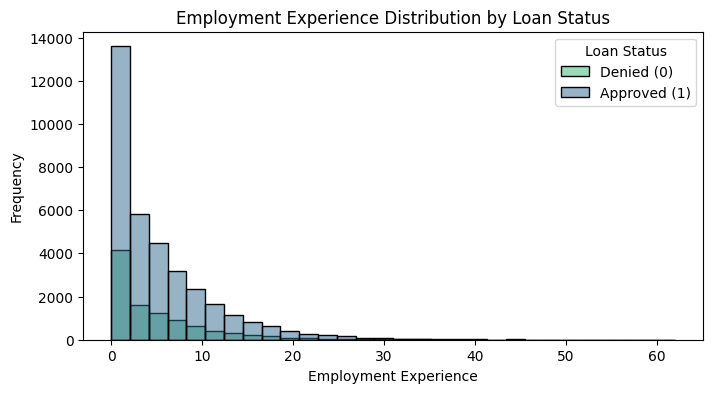

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Employment Experience by Loan Status
plt.figure(figsize=(8, 4))
sns.histplot(data=cleaned_data_numerical, x='person_emp_exp', hue='loan_status', kde=False, bins=30, palette='viridis')
plt.title("Employment Experience Distribution by Loan Status")
plt.xlabel("Employment Experience")
plt.ylabel("Frequency")
plt.legend(title="Loan Status", labels=["Denied (0)", "Approved (1)"])
plt.show()

Credit History Length Distribution by Loan Status It explores whether having a longer or shorter credit history affects the likelihood of loan approval.

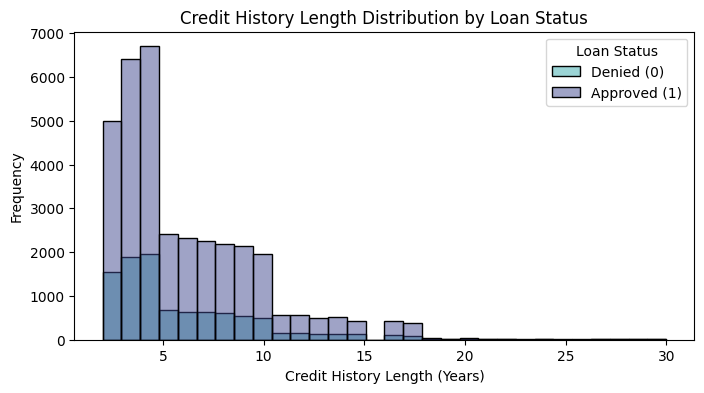

In [35]:
# Histogram for Credit History Length by Loan Status
plt.figure(figsize=(8, 4))
sns.histplot(data=cleaned_data_numerical, x='cb_person_cred_hist_length', hue='loan_status', kde=False, bins=30, palette='mako')
plt.title("Credit History Length Distribution by Loan Status")
plt.xlabel("Credit History Length (Years)")
plt.ylabel("Frequency")
plt.legend(title="Loan Status", labels=["Denied (0)", "Approved (1)"])
plt.show()

Preparing the data before building the model

If we calculate the mean and standard deviation of the entire dataset (or include X_test),
we will expose information about the test data to the training process. 
This violates the principle that the test data should remain unseen until model evaluation. 
Using X_train ensures that the test data remains independent and unbiased.

In [44]:
# Input predictors (all specified variables)
predictors = ['person_age', 'person_gender', 'person_income', 'person_emp_exp',
              'loan_amnt', 'loan_int_rate', 'loan_percent_income',
              'cb_person_cred_hist_length', 'credit_score',
              'previous_loan_defaults_on_file', 'person_education_Associate', 
              'person_education_Bachelor', 'person_education_Doctorate', 
              'person_education_High School', 'person_education_Master', 
              'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 
              'person_home_ownership_OWN', 'person_home_ownership_RENT', 
              'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 
              'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 
              'loan_intent_PERSONAL', 'loan_intent_VENTURE']

# Target variable
target = 'loan_status'

# Splitting data into predictors (X) and target (y)
X = cleaned_data_numerical[predictors]
y = cleaned_data_numerical[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing each column in X_train and X_test using the same mean and std from X_train
X_train_standardized = (X_train - X_train.mean()) / X_train.std()
X_test_standardized = (X_test - X_train.mean()) / X_train.std()

# Verifying the standardization
print("Standardized Training Data:")
print(X_train_standardized.head())

print("\nStandardized Testing Data:")
print(X_test_standardized.head())

Standardized Training Data:
       person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
7655    -0.635275       0.902557      -0.344533       -0.233670  -0.421988   
32432    7.677526       0.902557       0.166811        7.033353  -0.278836   
41959   -0.465626      -1.107928      -0.124213       -0.909672  -0.254182   
3515    -0.465626       0.902557      -0.491829       -0.402670   0.150619   
5493    -0.804924      -1.107928      -0.225557       -0.909672  -0.724197   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
7655       -0.376652            -0.224184                   -0.999347   
32432       0.003395            -0.569168                    4.694727   
41959      -1.466347            -0.339178                   -0.481704   
3515        0.003395             0.925763                   -0.481704   
5493        0.618871            -0.684162                   -0.999347   

       credit_score  previous_loan_defaults_on_file  ...  \
7655

Multiple Regression Model

In [47]:
# Predicting on the validation  data
y_test_pred = mlr_model.predict(X_test)

# ---Calculating  Performance Metrics ---
test_mae = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error
test_r2 = r2_score(y_test, y_test_pred)  # R² Score

print("\nTest Data Performance:")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Square Error (RMSE): {test_rmse:.4f}")
print(f"R² Score: {test_r2:.4f}")


Test Data Performance:
Mean Absolute Error (MAE): 0.2406
Root Mean Square Error (RMSE): 0.3010
R² Score: 0.4809


KNN model 

In [54]:
# --- Step 1: Initialized the KNN Classifier ---
knn = KNeighborsClassifier()

# --- Step 2: Defined the Grid for 'k' ---
param_grid = {'n_neighbors': list(range(1, 26))}  # Testing values of k from 1 to 26

# --- Step 3: Used GridSearchCV to Find the Best 'k' ---
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_standardized, y_train)

# --- Step 4: Displaying the Best 'k' ---
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k found using GridSearchCV: {best_k}")

# --- Step 5: Training the Final KNN Model with Best 'k' ---
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_standardized, y_train)

# --- Step 6: Evaluating the Model on Test Data ---
y_test_pred = knn_best.predict(X_test_standardized)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("\nTest Data Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Best k found using GridSearchCV: 21

Test Data Performance:
Accuracy: 0.8964

Confusion Matrix:
[[10140   316]
 [ 1082  1960]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     10456
           1       0.86      0.64      0.74      3042

    accuracy                           0.90     13498
   macro avg       0.88      0.81      0.84     13498
weighted avg       0.89      0.90      0.89     13498



Classification Tree

In [60]:
# --- Step 1: Initialized the Decision Tree Classifier ---
dt = DecisionTreeClassifier(random_state=42)

# --- Step 2: Defined the Hyperparameter Grid ---
param_grid = {
    'max_depth': [3, 5, 10, None],           # Depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10]       # Minimum samples required at a leaf node
}

# --- Step 3: Performed Grid Search ---
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_standardized, y_train)

# --- Step 4: Displayed the Best Parameters ---
best_params = grid_search.best_params_
print(f"Best Parameters Found Using GridSearchCV: {best_params}")

# --- Step 5: Trained the Final Model with Best Parameters ---
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(X_train_standardized, y_train)

# --- Step 6: Evaluated the Model on Test Data ---
y_test_pred = dt_best.predict(X_test_standardized)

# Calculated performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("\nTest Data Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters Found Using GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

Test Data Performance:
Accuracy: 0.9204

Confusion Matrix:
[[10217   239]
 [  836  2206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10456
           1       0.90      0.73      0.80      3042

    accuracy                           0.92     13498
   macro avg       0.91      0.85      0.88     13498
weighted avg       0.92      0.92      0.92     13498



Feature Importance Scores:
                           Feature  Importance
9   previous_loan_defaults_on_file    0.416476
6              loan_percent_income    0.192040
5                    loan_int_rate    0.178250
2                    person_income    0.098110
18      person_home_ownership_RENT    0.043471
8                     credit_score    0.017251
17       person_home_ownership_OWN    0.012912
15  person_home_ownership_MORTGAGE    0.007780
21     loan_intent_HOMEIMPROVEMENT    0.006768
22             loan_intent_MEDICAL    0.006479
24             loan_intent_VENTURE    0.005140
19   loan_intent_DEBTCONSOLIDATION    0.005083
0                       person_age    0.003054
4                        loan_amnt    0.001932
20           loan_intent_EDUCATION    0.001381
7       cb_person_cred_hist_length    0.001221
1                    person_gender    0.000828
23            loan_intent_PERSONAL    0.000737
3                   person_emp_exp    0.000671
13    person_education_High Schoo

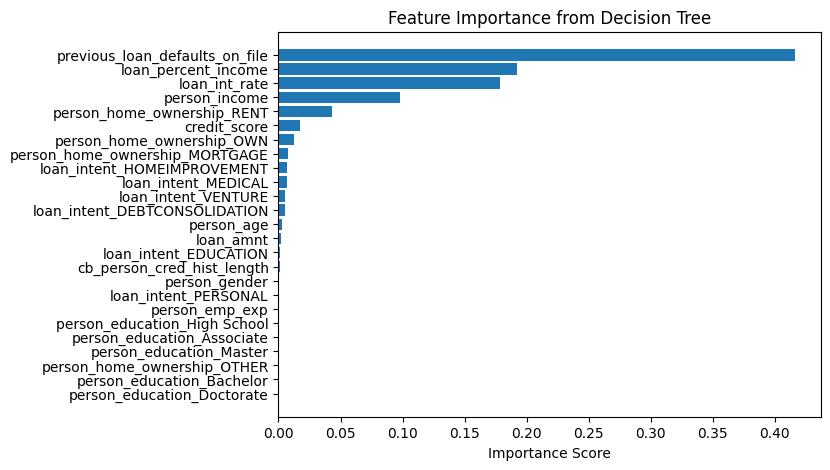

In [61]:
# Retrieved feature importance scores
import pandas as pd

#  dt_best is our trained Decision Tree
feature_importances = dt_best.feature_importances_

# Map feature importance to feature names
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying feature importance
print("Feature Importance Scores:")
print(feature_importance_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.show()

Model Comparison




KNN Model:



Best K: Found using GridSearchCV as 21.
Performance:
Accuracy: 89.64%
Confusion Matrix: High recall for class 0 (loan denied) and moderate recall for class 1 (loan approved).
Precision: Class 0 precision (90%) is slightly better than class 1 (86%).
F1 Score: Weighted F1 score is around 89%.
Strengths:
Simple and interpretable for small datasets.
Weaknesses:
Computationally intensive for large datasets.




Multiple Linear Regression (MLR):




Performance:
Mean Absolute Error (MAE): 0.2406
Root Mean Squared Error (RMSE): 0.3010
R² Score: 48.09%
Strengths:
Good for understanding the relationships between predictors and the target variable.
Coefficients provide insight into feature importance.
Weaknesses:
Assumes linear relationships, which might not capture the true nature of the data.
R² Score is relatively low, indicating limited explanatory power.




Classification Tree:




Best Parameters: Found using GridSearchCV as:
max_depth: 10
min_samples_split: 2
min_samples_leaf: 10
Performance:
Accuracy: 92.04%
Confusion Matrix: Better recall for both classes compared to KNN.
Precision: Comparable precision to KNN.
F1 Score: Weighted F1 score is higher than KNN (~92%).
Strengths:
Easily interpretable (visualizable as a decision tree).
Handles non-linear relationships and categorical data well.
Weaknesses:
Can overfit without proper tuning (but this was addressed via GridSearchCV).
Sensitive to small changes in data.

Conclusion



The Classification Tree model outperforms both KNN and Multiple Linear Regression on the validation data. It achieves the highest accuracy (92.04%), 
precision, and recall while maintaining interpretability.
Additionally, its ability to handle non-linear relationships and categorical variables makes it more suitable for this dataset,
given its diverse predictor set.
This decision is based on our project's goal of accurately predicting loan status while maintaining model robustness and interpretability​.

Based on the feature importance scores from the Classification Tree model. 
The Classification Tree was chosen because it outperformed KNN and Multiple Linear Regression with an accuracy of 92.04%,
making it the most reliable model for this analysis.

1. What are the most influential factors in predicting loan approval?

We identified the most influential factors based on the feature importance scores from the Classification Tree model:

Previous Loan Defaults on File → Importance: 0.416 (most significant factor).
Loan Percent Income → Importance: 0.192

The top factors influencing loan approval are Previous Loan Defaults, Loan Percent Income.
These variables have the highest importance scores in the Classification Tree model.

2. How does credit history and score affect loan outcomes compared to demographic variables like age and education?

From the feature importance scores:
Credit Score → Importance: 0.017 (low influence).
Credit History Length (cb_person_cred_hist_length) → Importance: 0.001 (minimal impact).
Demographic Variables:
Person Age → Importance: 0.003 (low impact).
Education Features → Importance: 0.0 (no impact).



Conclusion: 


Credit Score and Credit History Length play a small role in predicting loan approval,
while demographic variables like Age and Education have negligible impact. 
This conclusion is based on the feature importance scores from the Classification Tree model.

3. Is there a significant difference in loan approval rates between different types of home ownership (e.g., rent, own, mortgage)?

The feature importance scores for Home Ownership categories show:

Home Ownership (Rent) → Importance: 0.043 
Home Ownership (Own) → Importance: 0.012 
Home Ownership (Mortgage) → Importance: 0.007 


                             
Conclusion:
                             
                             
Yes, there is a significant difference. 




Home Ownership (Rent) is a more significant predictor of loan decisions compared to Own and Mortgage.

4. Does a longer credit history correlate with higher loan approval rates?

From the feature importance scores:

Credit History Length (cb_person_cred_hist_length) → Importance: 0.001 (very low).



Conclusion:

A longer credit history does not significantly correlate with higher loan approval rates, 
as evidenced by its minimal importance score in the Classification Tree model.

5. What role does employment experience play in loan approval and default rates?

Based on the feature importance scores:

Employment Experience (person_emp_exp) → Importance: 0.0007 (extremely low).


Conclusion:

Employment experience plays a negligible role in loan approval decisions, as indicated by its very low importance score in the Classification Tree model.

6. How do different loan purposes (e.g., education, medical, personal) affect the likelihood of approval?

From the feature importance scores for loan purposes:

Home Improvement → Importance: 0.0067 (moderate influence).
Medical → Importance: 0.0064 (low influence).
Debt Consolidation → Importance: 0.0050.
Venture → Importance: 0.0051.
Education → Importance: 0.0013 (very low).
Personal Loans → Importance: 0.0007 (negligible).
Conclusion: Loan purposes like Home Improvement and Medical have small but noticeable influence on loan approvals,
while Education and Personal Loans have very little impact. 
These insights are drawn from the feature importance scores of the Classification Tree model.